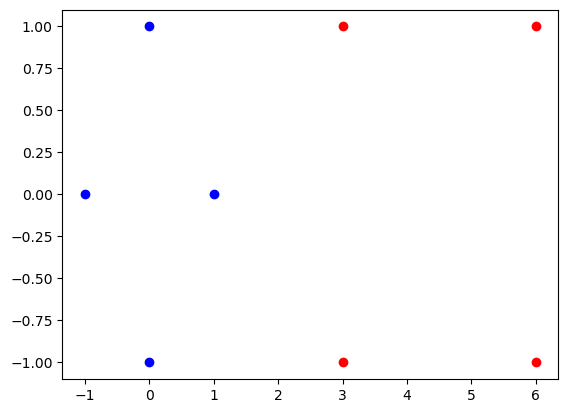

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pos_points = [[3, 1], [3, -1], [6, 1],[6,-1]]
neg_points = [[1, 0], [0, 1], [0, -1],[-1,0]]

fig, ax = plt.subplots()

plt.scatter([x[0] for x in pos_points], [x[1] for x in pos_points], color = 'red')
plt.scatter([x[0] for x in neg_points], [x[1] for x in neg_points], color = 'blue')
plt.show()

Homogeneous Vectors:
 [[ 1  0  1]
 [ 3  1  1]
 [ 3 -1  1]]
Gram Matrix (A):
 [[ 2  4  4]
 [ 4 11  9]
 [ 4  9 11]]
Target Vector (B): [-1  1  1]
Alpha values: [-3.5   0.75  0.75]
Weight vector (W): [[ 1.  0. -2.]]
99999999 2.0


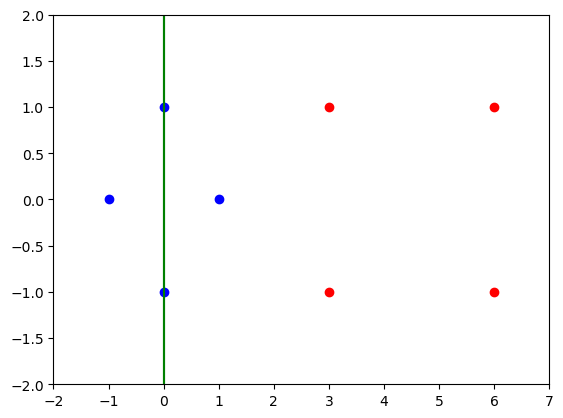

In [19]:
# analyse the above plot to find the support vectors
pos_support_vec = [[3, 1], [3,-1]]
neg_support_vec = [[1, 0]]
vectors =neg_support_vec +pos_support_vec 

homogenous_vec = np.array([x + [1] for x in vectors])
print("Homogeneous Vectors:\n", homogenous_vec)

n = len(vectors)

A = homogenous_vec @ np.transpose(homogenous_vec)
print("Gram Matrix (A):\n", A)


B = np.array( [-1] * len(neg_support_vec)+[1] * len(pos_support_vec) )
print("Target Vector (B):", B)

alpha = np.linalg.solve(A, B)
print("Alpha values:", alpha)



W = np.zeros((1, len(homogenous_vec[0])))
ind = 0
for x in homogenous_vec:
    W = W + (alpha[ind] * x)
    ind += 1

print("Weight vector (W):", W)

# the last index of W has bias
# if W[0][1]!=0:
#     w, b = W[0][0] / W[0][1], W[0][2] / W[0][1]
# else: 
#     w,b=999999,W[0][2]
#weights are never calculated like this


W_sub = W[0][:2]
norm = np.linalg.norm(W_sub)

w1,w2,b=W[0][0],W[0][1],W[0][2]
# perpendicualr distance to hyperplane is d
# He is a very cheap teacher and just copies solved examples from other sites and make videos.
# from Augmented Weight = [w1 w2 w3] = [1 0 -2]
# weights, w = [w1 w2] = [1 0] and bias, b = w3 = -2.
# weights vector, w is the vector normal to the hyperplane.
# d = |b|/norm(w) = |-2|/(1) = 2 is the normal distance of hyperplane from the origin.
# sign of the bias, b tells the position of origin relative to the hyperplane that is if it is negative then origin is on left of hyperplane, if it is positive then origin is on right of the hyperplane, and if it is 0 then hyperplane passes through origin.
# You can directly write equation of hyperplane of this kind like: x/(d/w1) + y/(d/w2) = 1
# which is x/(2/1) + y/(2/0) = 1 => x =2 in this question.
d=abs(b)/norm
if w1!=0 and w2!=0:
    final_w=-1/w1*w2
else:
    final_w=99999999

if w2!=0:
    final_b=b/w2
else: 
    final_b=d
# Define x range for the decision boundary
x_vals = np.linspace(-9, 10, 100)
y_vals = final_w * x_vals + final_b # Solve for y in terms of x
print(final_w,final_b)# Plot decision boundary


fig, ax = plt.subplots()
# plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
# plt.scatter([x[0] for x in pos_points], [x[1] for x in pos_points], color = 'red')
# plt.scatter([x[0] for x in neg_points], [x[1] for x in neg_points], color = 'blue')
# # plt.plot([i for i in range(-1, 7)], [(b0 * x) + b1 for x in range(-1, 7)], color = 'yellow')
ax.scatter([x[0] for x in pos_points], [x[1] for x in pos_points], color='red', label='Positive Points')
ax.scatter([x[0] for x in neg_points], [x[1] for x in neg_points], color='blue', label='Negative Points')

# Set axis limits to prevent auto-scaling
ax.set_xlim(min([x[0] for x in pos_points] + [x[0] for x in neg_points]) - 1,
            max([x[0] for x in pos_points] + [x[0] for x in neg_points]) + 1)
ax.set_ylim(min([x[1] for x in pos_points] + [x[1] for x in neg_points]) - 1,
            max([x[1] for x in pos_points] + [x[1] for x in neg_points]) + 1)
plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
# Plot decision boundary line
ax.plot(x_vals, y_vals, color='green', label='Decision Boundary')
plt.show()

